In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [118]:
df = pd.read_csv("Audi_A1_listings.csv")

In [119]:
df.head(3)

,index,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),href,PPY,MileageRank,PriceRank,PPYRank,Score
0,0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,https://www.autotrader.co.uk/car-details/20221...,2499.166667,215,163,340,718
1,4,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,https://www.autotrader.co.uk/car-details/20221...,2688.750000,222,330,276,828
2,7,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,https://www.autotrader.co.uk/car-details/20221...,3599.666667,221,327,94,642


In [120]:
df.drop(["index","href","MileageRank","PriceRank","PPYRank","Score"],axis=1,inplace=True)
df.head(3)

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£),PPY
0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,3599.666667


In [121]:
df.rename(columns={"Price(£)":"Price"},inplace=True)
df.head(3)

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price,PPY
0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0,3599.666667


In [122]:
df["Engine"] = df["Engine"].str.replace("L","")
df.head(3)

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price,PPY
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    object 
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price             471 non-null    float64
 9   PPY               471 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 36.9+ KB


In [124]:
df["Engine"] = pd.to_numeric(df["Engine"])
df.head(3)

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price,PPY
0,2018.0,Hatchback,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,Hatchback,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,Hatchback,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667


In [125]:
df["Type"].nunique()

1

In [126]:
df.drop("Type",axis=1,inplace=True)
df.head(3)

,Year,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price,PPY
0,2018.0,44000.0,1.6,114.398422,Manual,Diesel,1,14995.0,2499.166667
1,2016.0,42596.0,1.0,93.688363,Manual,Petrol,3,10755.0,2688.750000
2,2015.0,42700.0,1.4,123.274162,Manual,Petrol,2,10799.0,3599.666667


In [127]:
pd.get_dummies(df, columns=["Transmission","Fuel"])

,Year,Mileage(miles),Engine,PS,Number_of_Owners,Price,PPY,Transmission_Automatic,Transmission_Manual,Fuel_Diesel,Fuel_Petrol
0,2018.0,44000.0,1.6,114.398422,1,14995.0,2499.166667,0,1,1,0
1,2016.0,42596.0,1.0,93.688363,3,10755.0,2688.750000,0,1,0,1
2,2015.0,42700.0,1.4,123.274162,2,10799.0,3599.666667,0,1,0,1
3,2014.0,86000.0,1.6,103.550296,3,7490.0,3745.000000,0,1,1,0
4,2014.0,104310.0,1.6,103.550296,3,7400.0,3700.000000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
466,2014.0,40195.0,1.4,138.067061,3,11275.0,5637.500000,1,0,0,1
467,2020.0,26218.0,1.0,114.398422,1,18495.0,2311.875000,0,1,0,1
468,2017.0,48571.0,1.4,123.274162,2,11995.0,2399.000000,0,1,0,1
469,2020.0,9584.0,1.0,93.688363,1,19970.0,2496.250000,0,1,0,1


In [128]:
 df = pd.get_dummies(df, columns=["Transmission","Fuel"],drop_first=True)
 df.head(3)

,Year,Mileage(miles),Engine,PS,Number_of_Owners,Price,PPY,Transmission_Manual,Fuel_Petrol
0,2018.0,44000.0,1.6,114.398422,1,14995.0,2499.166667,1,0
1,2016.0,42596.0,1.0,93.688363,3,10755.0,2688.750000,1,1
2,2015.0,42700.0,1.4,123.274162,2,10799.0,3599.666667,1,1


In [130]:
y = df["Price"]
x = df.drop("Price",axis=1)

In [133]:
model = LinearRegression().fit(x,y)

In [135]:
model.score(x,y)

0.9595295772839731

In [138]:
model.coef_

array([ 2.26627948e+03, -2.09216500e-02, -1.71062934e+03,  3.84967120e+01,
       -9.36188329e+00,  2.04396569e+00, -8.95584314e+02, -9.64752218e+02])

In [139]:
model.intercept_

-4563149.977932285

In [140]:
y_pred = model.predict(x)

<Axes: xlabel='Price'>

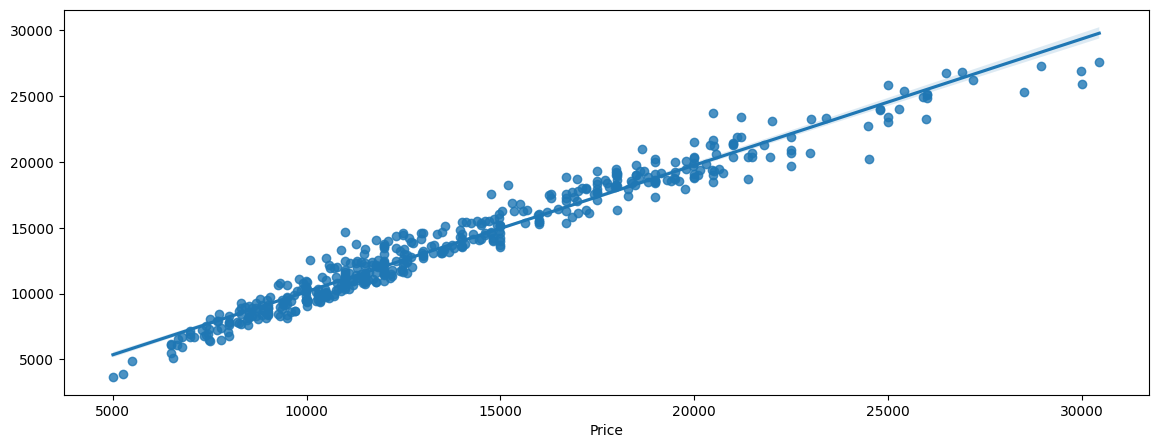

In [141]:
plt.figure(figsize=(14,5))
sns.regplot(x=y,y=y_pred)